In [1]:
# Libraries
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set background color of graphics to dark
# plt.style.use('dark_background')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Read the data
df_original = pd.read_csv('../bicycles.csv')


# Show the number of rows and columns
print("Number of rows and columns: ")
print(df_original.shape)

# Data types
print(df_original.dtypes)

# Count duplicated values
print('Count duplicated values')
print(df_original.duplicated().sum())

# Remove duplicated values
print('\nCheck whether duplicated values were successfully removed')
df_original.drop_duplicates()
print(df_original.duplicated().sum())

/Users/lara/Documents/Lara's scientific programming/scientific_programming/Week_05/challenge/mySolution
Number of rows and columns: 
(600, 6)
web-scraper-order        object
web-scraper-start-url    object
title_raw                object
address_raw              object
price_raw                object
description_raw          object
dtype: object
Count duplicated values
0

Check whether duplicated values were successfully removed
0


In [2]:
# Extract values using the lambda function
df_original['price'] = df_original['price_raw'].apply(lambda x: re.sub('[^\d]', '', x))

# Remove records with no prices
df_sub = df_original[df_original['price'] != '']

# Change data type to int
df_sub['price'] = df_sub['price'].astype('int32')
# IMPORTANT

# Check data type
print(df_sub['price'].dtypes)

int32


In [3]:
# df_sub_02 subset welches nur preise zwischen 200 - 2000 enthält
df_sub_02 = df_sub.loc[(df_sub['price'] >= 200) & (df_sub['price'] <= 2000)]
df_sub_02

,web-scraper-order,web-scraper-start-url,title_raw,address_raw,price_raw,description_raw,price
1,1678953522-602,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Thule FAHRRADTRÄGER Mod. 307130,"Zürich, 8032, 26.02.2023",200.-,"Da wir ohne Velos auf Reise gehen, verkaufen w...",200
3,1678953522-604,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Hymer-Veloträger- Multitalent Tele 4,"St. Gallen, 9607, 26.02.2023",320.-,"- Top Zustand, unbenutzt\n- Masse: [LxB(T)xH] ...",320
6,1678953522-607,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Fahrradträger Veloträger Anhängerkupplung,"Glarus, 8866, 26.02.2023",390.-,"Veloträger für 4 Velos,\nauch für E- Bike auf...",390
15,1678953522-616,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,"Veloträger, Fahrradträger 4 , 4er","Schwyz, 8806, 25.02.2023",399.-,"Fahrradträger für 4 Velos\nTraglast ca 65,\nAb...",399
16,1678953522-617,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Fahrradträger 3er Verkauf & Vermietung,"Glarus, 8865, 25.02.2023",355.-,"Für3 Velos\nVerkauf 355,-, Nutzlast 60kg nett...",355
...,...,...,...,...,...,...,...
577,1678953574-1178,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Condor Sarina Damen Velo / City Bike / Red Love,"Aargau, 5600, Heute 07:29",320.-,Zu verkaufen ist dieses wunderbare Condor Sari...,320
578,1678953574-1179,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Alu-Elektro-Faltrad,"Basel-Landschaft, 4410, Heute 07:24",450.-,"2 Stück Campingvelos, elektrisch 3-Gang, aus A...",450
585,1678953574-1186,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Veloträger VW T6/ 6.1,"Luzern, 6122, Heute 06:05",280.-,Wegen nicht Gebrauch zu verkaufen. Der Träger ...,280
593,1678953574-1194,https://www.tutti.ch/de/q/suche/Ak6V2ZWxvc8CUw...,Kindervelo MTB Cycletec Moskito 20 Zoll,"Bern, 3084, Gestern 19:06",200.-,"Das MTB Cycletech Moskito 20? ist ein tolles, ...",200


<Axes: xlabel='price'>

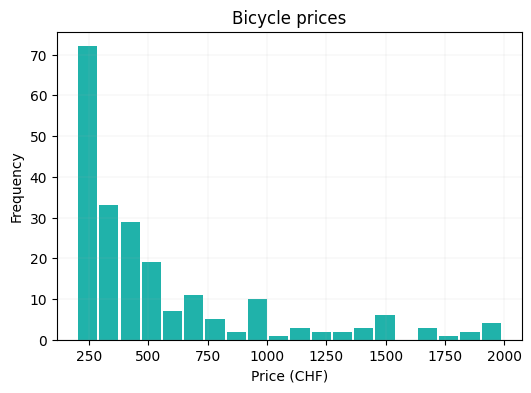

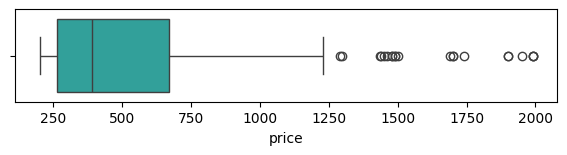

In [6]:
# histogram
plt.figure(figsize=(6,4))
df_sub_02['price'].plot.hist(grid=True, 
                        bins=20, # number of bars
                        rwidth=0.9,
                        color='lightseagreen')
plt.title('Bicycle prices')
plt.xlabel('Price (CHF)')
plt.ylabel('Frequency')

plt.grid(linestyle='-', linewidth=0.1)

# Boxplot
plt.figure(figsize=(7,1.2)) # width, height
plt.ticklabel_format(style='plain')
sns.boxplot(x=df_sub_02['price'], color="lightseagreen")

In [8]:
df_sub_02['location'] = df_sub_02['address_raw'].str.split(',').str[0]
df_sub_02[['location']]


,location
1,Zürich
3,St. Gallen
6,Glarus
15,Schwyz
16,Glarus
...,...
577,Aargau
578,Basel-Landschaft
585,Luzern
593,Bern


In [ ]:
# Use set and dictionary comprehension to create a dictionary
# linebreak defined by \
location_dict = {location: df_sub_02.loc[df_sub_02['location'] == location, 'price'].tolist() \
            for location in set(df_sub_02['location'])}

# Print the resulting dictionary keys and values
print('Dictionary with keys and values:')
print(location_dict)

Dictionary with keys and values:
{'Glarus': [390, 355], 'Freiburg': [432], 'Thurgau': [1900, 400, 400, 200, 450], 'Schwyz': [399, 250, 324], 'Luzern': [495, 220, 320, 250, 460, 200, 480, 240, 220, 280, 280, 280, 439, 280], 'Wallis': [200], 'Graubünden': [590, 250, 400], 'Basel-Stadt': [1435, 600], 'Uri': [260], 'Aargau': [480, 580, 320, 210, 650, 300, 300, 600, 230, 320, 480, 200, 280, 390, 250, 250, 280, 700, 800, 230, 480, 699, 230, 250, 270, 280, 400, 1900, 1700, 250, 320, 500, 300, 499, 1100, 500, 250, 320, 320, 230, 280, 250, 260, 230, 250, 280, 230, 260, 230, 220, 950, 950, 280, 390, 230, 360, 320, 380, 599, 599, 320], 'Appenzell Ausserrhoden': [250], '04.03.2023': [320], 'Tessin': [280], 'Zug': [440, 440, 222, 245], 'Basel-Landschaft': [490, 320, 950, 870, 1190, 1440, 555, 450], 'Zürich': [200, 220, 800, 350, 550, 690, 339, 250, 200, 251, 949, 599, 336, 949, 899, 1690, 990, 250, 430, 379, 1290, 990, 240, 550, 990, 230, 270, 200, 950, 790, 1700, 300, 949, 300, 455, 270, 280, 290,

In [ ]:
# Define the key
locationKey = 'Zürich'

# Check whether FERRARI is a key in car_dict
if locationKey in location_dict:
    print(f'The key {locationKey} exists!')

# Get all values from the key
print(f'\nHere are the available prices of the key {locationKey}:')
print(location_dict.get(locationKey))

The key Zürich exists!

Here are the available prices of the key Zürich:
[200, 220, 800, 350, 550, 690, 339, 250, 200, 251, 949, 599, 336, 949, 899, 1690, 990, 250, 430, 379, 1290, 990, 240, 550, 990, 230, 270, 200, 950, 790, 1700, 300, 949, 300, 455, 270, 280, 290, 250, 1230, 1030, 375, 450, 800, 240, 220]


In [ ]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.3.0
Datetime: 2024-03-25 12:10:04
Python Version: 3.10.13
-----------------------------------
